# Integrating Orbits

This is a demonstration of Euler's method for integrating orbits.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We consider low mass objects orbiting the Sun.  We work in units of AU, yr, and solar masses.  From Kepler's third law:

\begin{equation}
4 \pi^2 a^3 = G M P^2
\end{equation}

If $a$ is in AU, $P$ is in yr, and $M$ is in solar masses, then
\begin{equation}
a^3 = P^2
\end{equation}
and therefore
\begin{equation}
4 \pi^2 = G
\end{equation}

We work in coordinates with the Sun at the origin


In [2]:
# assuming 1 solar mass
GM = 4*np.pi**2

In [3]:
def rhs(x, y, u, v):
    """ RHS of the equations of motion.  X is the input coordinate
        vector and V is the input velocity vector """

    # current radius
    r = np.sqrt(x**2 + y**2)

    # position derivatives
    xdot = u
    ydot = v

    # velocity derivatives
    udot = -GM*x/r**3
    vdot = -GM*y/r**3

    return xdot, ydot, udot, vdot


A simple class for storing the solution history and plotting it

In [4]:
class Orbit:
    def __init__(self):
        self.t = []
        self.x = []
        self.y = []
        self.u = []
        self.v = []
        
    def add_point(self, time, xnew, ynew, unew, vnew):
        self.x.append(xnew)
        self.y.append(ynew)
        self.u.append(unew)
        self.v.append(vnew)
        
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)

        _ = ax.plot(orbit.x, orbit.y)
        _ = ax.set_aspect("equal", "datalim")
        return fig

In [5]:
def integrate(x0, y0, u0, v0, tmax, dt):
    """integrate the orbit with initial conditions X0, V0, using a
    timestep dt for a duration tmax"""
    
    t = 0
    x = x0
    y = y0
    u = u0
    v = v0
    
    o = Orbit()
    o.add_point(t, x, y, u, v)
    
    while (t < tmax):
    
        xdot, ydot, udot, vdot = rhs(x, y, u, v)
        x += dt * xdot
        y += dt * ydot
        u += dt * udot
        v += dt * vdot
        
        t += dt
        
        o.add_point(t, x, y, u, v)
        
        if t + dt > tmax:
            dt = tmax - t
        
    return o

Initial conditions are at perihelion with counter clockwise orbit:
\begin{align*}
x &= 0 \\
y &= a(1-e) \\
u &= \sqrt{\frac{GM}{a} \frac{1+e}{1-e}} \\
v &= 0
\end{align*}

In [6]:
def init_conditions(a, e):
    x0 = 0.0
    y0 = a*(1.0 - e)
    u0 = -np.sqrt((GM/a)* (1.0 + e) / (1.0 - e))
    v0 = 0.0
    
    return x0, y0, u0, v0

To integrate the orbit, we set the semi-major axis and eccentricity, specify one period (`tmax = 1`), and a timestep

In [7]:
a = 1.0
e = 0.0
x0, y0, u0, v0 = init_conditions(a, e)

orbit = integrate(x0, y0, u0, v0, 1.0, 0.1)


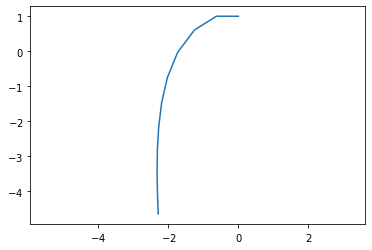

In [8]:
fig = orbit.plot()